In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

# **Adding** **data**

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
path_to_data_2d = '/content/drive/My Drive/data1/data_2d.csv'
path_to_data_mnist = '/content/drive/My Drive/data1/mnist.csv'
data_2d = pd.read_csv(path_to_data_2d)
mnist = pd.read_csv(path_to_data_mnist)

# **KMeans function**

In [71]:
K = range(1,10)

In [72]:
def kmeans(df):
  distortions = []
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
  return distortions


# **The Elbow Method for data 2d**

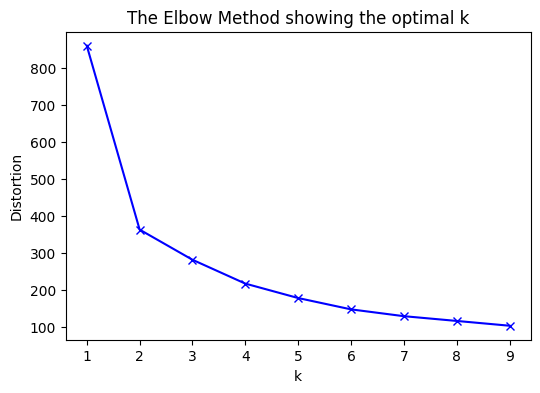

In [73]:
distortions = kmeans(data_2d)
plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For the given data, we conclude that the optimal number of clusters for the data is 2

# **Vizualization** **for** **data** **2d**

Transforming data

In [74]:
pca = PCA(n_components = 2)
data_2d = pca.fit_transform(data_2d)

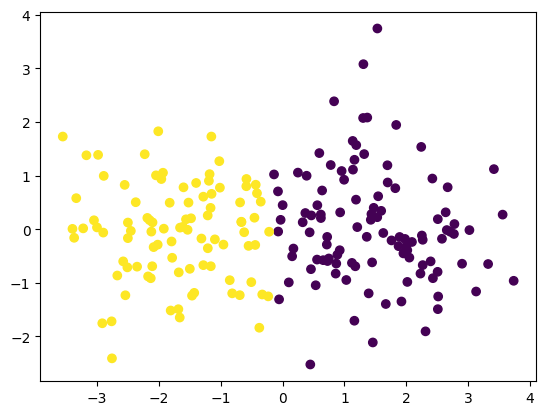

In [75]:
kmeans_data_2d = KMeans(n_clusters=2).fit(data_2d)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_data_2d.labels_)

# **The Elbow Method for mnist**

Transforming data

In [76]:
pca = PCA(n_components = 2)
mnist = pca.fit_transform(mnist)

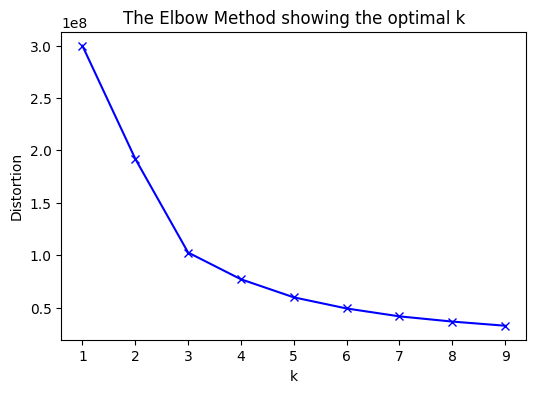

In [77]:
distortions = kmeans(mnist)
plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For the given data, we conclude that the optimal number of clusters for the data is 3

# **Vizualization for data 2d**

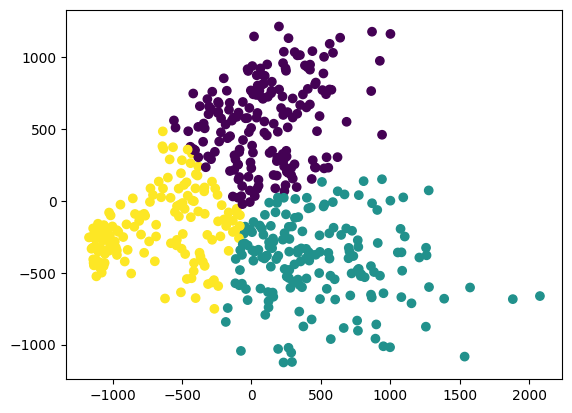

In [78]:
kmeans = KMeans(n_clusters=3).fit(mnist)
plt.scatter(mnist[:, 0], mnist[:, 1], c=kmeans.labels_)